In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
alpha = 1.9

def f(x):
    return np.minimum(alpha*x, alpha*(1-x))

In [8]:
N = 100  # Number of bins
M = 1000  # Number of random points per bin

bins = np.linspace(0, 1, N+1)  # Bin edges
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Bin centers

L = np.zeros((N, N))  # Transition matrix

for i in range(N):
    x_samples = np.random.uniform(bins[i], bins[i+1], M)
    
    x_next = f(x_samples)
    
    bin_indices = np.digitize(x_next, bins) - 1
    bin_indices = np.clip(bin_indices, 0, N-1)
    
    for j in bin_indices:
        L[i, j] += 1

L /= L.sum(axis=1, keepdims=True)

eigenvalues, eigenvectors = np.linalg.eig(L)

idx = np.argsort(-np.abs(eigenvalues))
eigenvalues = eigenvalues[idx]

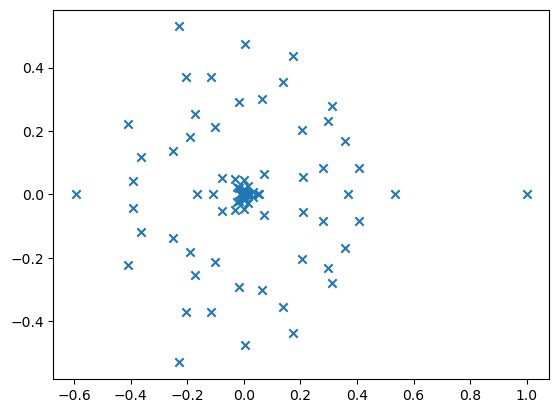

In [10]:
plt.scatter(eigenvalues.real, eigenvalues.imag, marker='x')